In [25]:
import pandas as pd

import dask.dataframe as dd
from dask.delayed import delayed

import numpy as np
import random

import os



# Extract User Stats

In [2]:
data_path = "/data/cloud_data/Google-clusterdata-2011-2/clusterdata-2011-2/"

In [3]:
df_schema = pd.read_csv(os.path.join(data_path, 'schema.csv'))

In [4]:
job_events_files = [
    os.path.join(data_path, 'job_events/part-00' + str(v).zfill(3) + '-of-00500.csv.gz')
    for v in range(500)]
cols_job_events = df_schema[df_schema['file pattern'] == 'job_events/part-?????-of-?????.csv.gz'].content.values

dfs_job_events = [delayed(pd.read_csv)(fn, header=None, index_col=False, names=cols_job_events, delimiter=',') for fn
                   in
                   job_events_files]

In [5]:
readings_job_events_df = dd.from_delayed(dfs_job_events)
users_stats = readings_job_events_df.groupby("user")["logical job name"].nunique().compute()
#unique_job = pd.DataFrame({'scheduling class' : readings_job_events_df.groupby(["job ID"])["scheduling class"].mean().compute()}).reset_index()


In [6]:
users_stats.sort_values(ascending=False)

user
QhKaMUnHYqtG1RJkmo+zqhY1dChfuOZ6oy8jYGDlsic=    13569
ycbMkTOh7F0buLKJlg4BU3OcBWrvF/JTZkXp9iv5zDg=     1952
njTE8BZMxQTFTmz+xeDNc6MGCjP2WhS6B4xK9+rTh8E=     1614
TpvNZQVOGF/Vr5q+Ka/froHMRlTulp4VfsBSHqvMnws=     1559
mbrS6V2tRbksMPO0y8EI9B9XT2ASaPRTNndslCGN/2A=     1450
                                                ...  
mrX4Kcz4OFOO6ZtVxbYUMNLp1F9VNJ+Axos/nRxidnY=        1
nCRQC/oR7wPUMiw/nKEa3Dj1gcDJ3LDNelUFwcxL6/A=        1
nUqVDXdM9atAOzsx+5/va999psFf0y+JfwOBKi0zLWk=        1
nyrcqMic80kBctoxpvmOz3KubcP0qqXGZ9qQC2+LNNo=        1
+1FmidGvPEtSIUb/sNfYW604cEUUmyhWukDdV7QXpUI=        1
Name: logical job name, Length: 933, dtype: int64

In [7]:
users_stats.sort_values(ascending=False).head(20)

user
QhKaMUnHYqtG1RJkmo+zqhY1dChfuOZ6oy8jYGDlsic=    13569
ycbMkTOh7F0buLKJlg4BU3OcBWrvF/JTZkXp9iv5zDg=     1952
njTE8BZMxQTFTmz+xeDNc6MGCjP2WhS6B4xK9+rTh8E=     1614
TpvNZQVOGF/Vr5q+Ka/froHMRlTulp4VfsBSHqvMnws=     1559
mbrS6V2tRbksMPO0y8EI9B9XT2ASaPRTNndslCGN/2A=     1450
5ANFyIGysAA6XzeFuFUqyXdJfrrczugfoYfXCP0FNk8=     1222
CCbg3K/uVFiG0k1eTEPIq8/Hgygvsn7T9Mk6/6PbmJ0=     1174
E+9U+J1Dicd5PJklbq2e5THQ29X6D8jmqQ0Zu53Kc+o=      924
8OkMisyvwLRFV8wxW85Psk0o/my2wpLBMFuoz4pvotY=      689
KnOrGoVt1Cw6OyE84swqjAkg5QLCb/01Xs/QvH1LxsA=      610
4Fcme9i094tsFIYftnXWeokd4qJbyn4pK++2fKP4Dk0=      565
HBL13RkuP8hPfuPHZHIJTQZkoEtBdUQ9gtpKwGmSfJc=      534
fJYeclskJqPWsAT6TX/r9X5OiIZpSEb2PBGliYAOMxM=      491
oPxcKd7feXmw+sZKrkp8/MvvNP/5kRG+Yy2fc/lz3Ks=      482
JbqRxZYX7GvL8n1DA2FRayE2ZzbB9bFinfQtV/GwKDM=      433
0LDWGmHtacCZ9lRhf84At4JNXg9NC0MXWExqxgC12M0=      384
68CsCZngOkuQn5lVo+dNXKGoFx9ZmJXWR+W7NAUmEH4=      343
h+AHNkpAYWyUGZCLOCRZnu19uttEULM3E6q0DN+KP8c=      321
Nugr6rX+U6WELDvGY6ars76

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

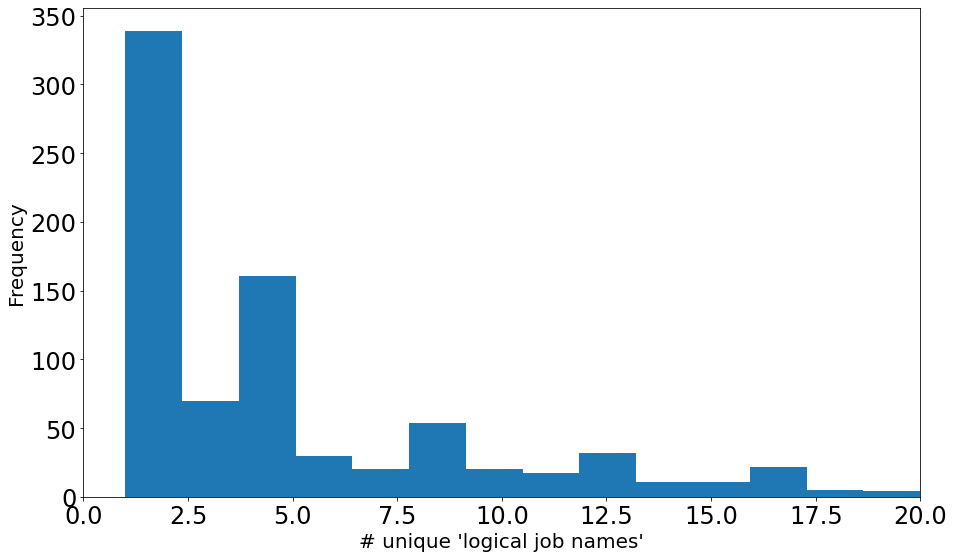

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
users_stats.plot.hist(bins=10000)
plt.xlim((0, 20))
plt.xlabel("# unique 'logical job names'", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)


In [9]:
filtered_users = users_stats[users_stats == 1].index.values

In [10]:
users_stats_job_IDs = readings_job_events_df[readings_job_events_df["user"].isin(filtered_users)].groupby("user")["job ID"].nunique().compute()

In [11]:
users_stats_job_IDs.sort_values(ascending=False).head(20)

user
ycZRNU4RSQwgWWUZA4vMXg1cwARkHIDNw9cDpJ+TiVE=    818
V3gkaBYkRGmIYaZIQ/+HmwRJ6k42KIcrpigU8G0R1O8=    434
6EB7hF1fvEsKWCjZX4OFGYxJj3vcUmac79q4JBDMl/Q=     30
rOjLyD7YsdjJ8yK3pQuJypHImZTADsqJ+3gjrzCbhRs=     30
pro671Zu7PulbKcOxKwqh1mRzwj64eCx75vCeuTTNGs=     29
ZhZslXdLyGltlm84DrqTZje7GjDUGdVqnRLqaT9b5Ds=     28
AWf+PDTvJuCNrv0g7ExfkXhvg0SmRIqErixnMQmsEdQ=     28
RN8cn+u/XUphWe00LJyZAft6TBMVHDBtjDb6mxmcefw=     22
naRd74/Yj3/s9mrCvs9r1zrFhjbdkAvUo6AGA9HyyMs=     21
90P5pnzFfhJeTbcIDOA3aw3CPdc2CimYMNcpYJE+VCo=     20
qMqLkvDMbGclodo++PazSwJ/m1OBj1LR8ENI9ss+sIw=     19
Gwa0aFOSuaLGi77/ygwnuRA3q+ZEozcW+filXQEZk08=     13
Xpl0NK+SIprze/zxIFQ1da/IYvl8sWNrSC7UNFfpLBo=     11
BNk+QyW+yTXp2PRvCzIYviHHb2NmRBOmNKAIzTM8Eu8=     10
9CBQ7SoN2Ugs70K7D0gNcDN4ontRHoh8xBki+oLCpvA=     10
ZNALrMu8fodKUX6AaIez0ktpGZ3T60bcX6QkOK1zeDg=      9
1axPeTXGqdyhBhp4kATcI3SXmglvL0k9ucaASoCgYVs=      9
yG6hka9ZjaGR86mL6V7tqhEogFsNhYU5/6w9rcTiQP0=      8
mda1j51QCyPpUbPfYSwfLB7WQCUHyTskT2307Pa7eqc=      8
aduf8Zo

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 432x288 with 0 Axes>

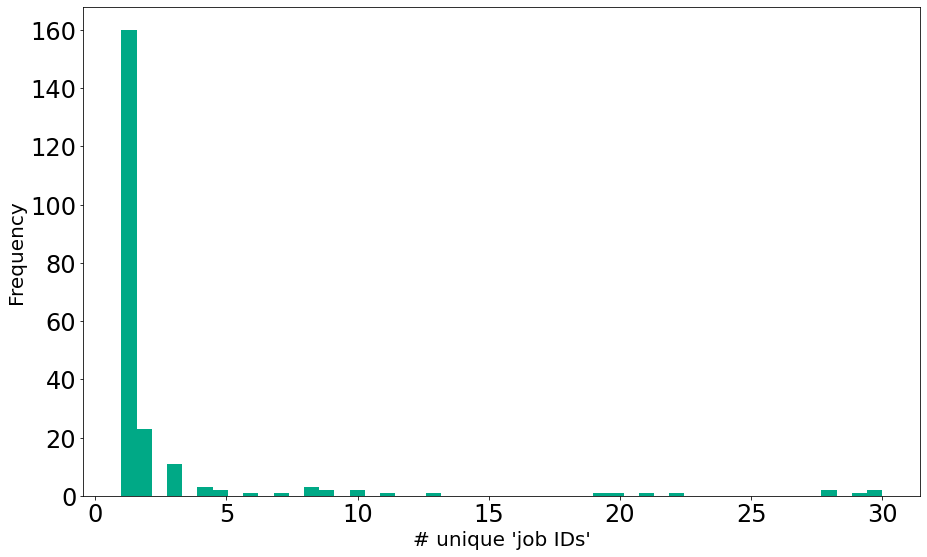

In [12]:
# Job ID color is blue-green, i.e., #00a986. Source: https://www.pinterest.com/pin/571183165231710475/
color = "#00a986"

plt.clf()
plt.figure(figsize=(15,9))
users_stats_job_IDs[users_stats_job_IDs <= 30].plot.hist(bins=50, color=color)
#plt.xlim((0, 20))
plt.xlabel("# unique 'job IDs'", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)


In [13]:
# Select user according to the max number| of logical job names
selected_user_top = users_stats.sort_values(ascending=False).index.values[19]

# Select user according to the number of Job IDs generated, given that he has a unique 'logical job name', excluding the onse that have to
selected_user = users_stats_job_IDs[users_stats_job_IDs <= 30].sort_values(ascending=False).index.values[0]
selected_user

'6EB7hF1fvEsKWCjZX4OFGYxJj3vcUmac79q4JBDMl/Q='

# Select jobs - single application user
from user according to the number of Job IDs generated, given that he has a unique 'logical job name', excluding the onse that have to

Select the job ID that has the higher submission time - i.e., that has been submitted later than the others

In [14]:
jobs_submit_time = readings_job_events_df[(readings_job_events_df["user"] == selected_user) & (readings_job_events_df["event type"] == 0)][["job ID", "time"]].compute()

In [15]:
jobs_submit_time.sort_values(by=['time']).tail(3)


,job ID,time
3727,6455247290,2163246499342
1029,6455637114,2166492257319
1124,6459863349,2211803636806


In [16]:
jobs_sched_time = readings_job_events_df[(readings_job_events_df["user"] == selected_user) & (readings_job_events_df["event type"] == 1)][["job ID", "time"]].compute()

In [17]:
jobs_sched_time.sort_values(by=['time']).tail(3)


,job ID,time
3728,6455247290,2163248112413
1030,6455637114,2166493600612
1125,6459863349,2211805139889


Check that there are no more than one schedule for job ID

In [18]:
jobs_sched_time.groupby("job ID")["time"].nunique().sort_values(ascending=False)

job ID
6459863349    1
6455637114    1
6276205069    1
6279149566    1
6280098414    1
6280938625    1
6281608173    1
6282137911    1
6282477251    1
6286986566    1
6287530222    1
6288671063    1
6289351010    1
6295771211    1
6318360948    1
6318433294    1
6320272298    1
6320907352    1
6321052789    1
6331313842    1
6333973964    1
6342379496    1
6342533694    1
6370962787    1
6371293677    1
6371991663    1
6454994228    1
6455063115    1
6455247290    1
6274284294    1
Name: time, dtype: int64

In [19]:
selected_job = jobs_sched_time.sort_values(by=['time'])["job ID"].values[-1]
selected_job

6459863349

# Extract tasks infos - single application user

In [28]:
cols_task_usage = df_schema[df_schema['file pattern'] == 'task_usage/part-?????-of-?????.csv.gz'].content.values
task_usage_files = [os.path.join(data_path, 'task_usage','part-00'+ str(v).zfill(3)+'-of-00500.csv.gz')
                        for v in range(0, 500)]

dfs_task_usage = [delayed(pd.read_csv)(fn, header=None, index_col=False, names=cols_task_usage, delimiter=',') for fn in
           task_usage_files]
readings_task_usage_df = dd.from_delayed(dfs_task_usage)


## Selected jobs

### Selected job requests

In [31]:
cols_task_events = df_schema[df_schema['file pattern'] == 'task_events/part-?????-of-?????.csv.gz'].content.values
task_events_files = [os.path.join(data_path, 'task_events','part-00'+ str(v).zfill(3)+'-of-00500.csv.gz')
                        for v in range(0, 500)]

dfs_task_events = [delayed(pd.read_csv)(fn, header=None, index_col=False, names=cols_task_events, delimiter=',') for fn in
           task_events_files]
readings_task_events_df = dd.from_delayed(dfs_task_events)

In [32]:
selected_job_requests = readings_task_events_df[readings_task_events_df['job ID'] == selected_job].groupby(["job ID", "CPU request", "memory request", "disk space request"]).count().compute()

In [33]:
selected_job_requests.reset_index(inplace=True)

In [36]:
selected_job_requests

,job ID,CPU request,memory request,disk space request,time,missing info,task index,machine ID,event type,user,scheduling class,priority,different machines restriction
0,6459863349,0.1875,0.04773,0.000019,3,0,3,2,3,3,3,3,3


In [37]:
selected_job_requests = selected_job_requests[["job ID", "CPU request", "memory request", "disk space request", 'priority', 'different machines restriction']]
selected_job_requests

,job ID,CPU request,memory request,disk space request,priority,different machines restriction
0,6459863349,0.1875,0.04773,0.000019,3,3


In [77]:
selected_job_requests_mean = readings_task_events_df[readings_task_events_df['job ID'] == selected_job].groupby(["job ID", "CPU request", "memory request", "disk space request"]).mean().compute()

In [78]:
selected_job_requests_mean

,,,,time,missing info,task index,machine ID,event type,scheduling class,priority,different machines restriction
job ID,CPU request,memory request,disk space request,,,,,,,,
6459863349,0.1875,0.04773,0.000019,2.212289e+12,NaN,0.0,1272487.0,2.0,0.0,1.0,0.0


### Selected job stats

In [38]:
selected_job_stats = readings_task_usage_df[readings_task_usage_df['job ID'] == selected_job].groupby("end time")[['start time', 'end time', 
                                                                                                                   'CPU rate', 'canonical memory usage', 'local disk space usage', 
                                                                                                                  ]].agg([
'mean',
'min',
'max',
dd.Aggregation("perc_15", chunk=lambda x: x.quantile(0.15), agg=lambda y: y.mean()),
dd.Aggregation("perc_25", chunk=lambda x: x.quantile(0.25), agg=lambda y: y.mean()),
dd.Aggregation("median",chunk=lambda x: x.quantile(0.50), agg=lambda y: y.mean()),
dd.Aggregation("perc_75", chunk=lambda x: x.quantile(0.15), agg=lambda y: y.mean()),
dd.Aggregation("perc_90", chunk=lambda x: x.quantile(0.90), agg=lambda y: y.mean()),
dd.Aggregation("perc_95", chunk=lambda x: x.quantile(0.95), agg=lambda y: y.mean()),
dd.Aggregation("perc_99", chunk=lambda x: x.quantile(0.99), agg=lambda y: y.mean()),
]).compute()

In [45]:
print(selected_job_stats["start time"]["min"].min(), selected_job_stats["end time"]["max"].max())

2211818000000 2213276000000


### Selected job ratio computation

In [39]:
out = (selected_job_stats["CPU rate"].values / selected_job_requests["CPU request"].values[0])
out = np.concatenate((out, (selected_job_stats["canonical memory usage"].values / selected_job_requests["memory request"].values[0])), axis=1)
out = np.concatenate((out, (selected_job_stats["local disk space usage"].values / selected_job_requests["disk space request"].values[0])), axis=1)

selected_norm_usage = pd.DataFrame(data=out)

In [40]:
columns=[(              'CPU ratio',    'mean'),
            (              'CPU ratio',     'min'),
            (              'CPU ratio',     'max'),
            (              'CPU ratio', 'perc_15'),
            (              'CPU ratio', 'perc_25'),
            (              'CPU ratio',  'median'),
            (              'CPU ratio', 'perc_75'),
            (              'CPU ratio', 'perc_90'),
            (              'CPU ratio', 'perc_95'),
            (              'CPU ratio', 'perc_99'),
            ('canonical memory ratio',    'mean'),
            ('canonical memory ratio',     'min'),
            ('canonical memory ratio',     'max'),
            ('canonical memory ratio', 'perc_15'),
            ('canonical memory ratio', 'perc_25'),
            ('canonical memory ratio',  'median'),
            ('canonical memory ratio', 'perc_75'),
            ('canonical memory ratio', 'perc_90'),
            ('canonical memory ratio', 'perc_95'),
            ('canonical memory ratio', 'perc_99'),
            ('local disk space ratio',    'mean'),
            ('local disk space ratio',     'min'),
            ('local disk space ratio',     'max'),
            ('local disk space ratio', 'perc_15'),
            ('local disk space ratio', 'perc_25'),
            ('local disk space ratio',  'median'),
            ('local disk space ratio', 'perc_75'),
            ('local disk space ratio', 'perc_90'),
            ('local disk space ratio', 'perc_95'),
            ('local disk space ratio', 'perc_99')]

selected_norm_usage.columns = pd.MultiIndex.from_tuples(columns)
selected_norm_usage

CPU ratio                                                              \
        mean       min       max   perc_15   perc_25    median   perc_75   
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.196640  0.196640  0.196640  0.196640  0.196640  0.196640  0.196640   
2   0.492853  0.492853  0.492853  0.492853  0.492853  0.492853  0.492853   
3   0.125653  0.125653  0.125653  0.125653  0.125653  0.125653  0.125653   
4   0.210933  0.210933  0.210933  0.210933  0.210933  0.210933  0.210933   
5   0.206400  0.206400  0.206400  0.206400  0.206400  0.206400  0.206400   
6   0.196640  0.196640  0.196640  0.196640  0.196640  0.196640  0.196640   
7   0.218400  0.218400  0.218400  0.218400  0.218400  0.218400  0.218400   
8   0.221333  0.221333  0.221333  0.221333  0.221333  0.221333  0.221333   
9   0.191733  0.191733  0.191733  0.191733  0.191733  0.191733  0.191733   
10  0.230773  0.230773  0.230773  0.230773  0.230773  0.230773  0.230773   
11  0.207040  0.207040  0.207040  0.207040  0.207040  0.207040  0.207040   
12  0.376320  0.376320  0.376320  0.376320  0.376320  0.376320  0.376320   
13  0.112640  0.112640  0.112640  0.112640  0.112640  0.112640  0.112640   
14  0.173493  0.173493  0.173493  0.173493  0.173493  0.173493  0.173493   
15  0.213227  0.213227  0.213227  0.213227  0.213227  0.213227  0.213227   
16  0.274080  0.274080  0.274080  0.274080  0.274080  0.274080  0.274080   
17  0.214187  0.214187  0.214187  0.214187  0.214187  0.214187  0.214187   
18  0.208320  0.208320  0.208320  0.208320  0.208320  0.208320  0.208320   
19  0.207360  0.207360  0.207360  0.207360  0.207360  0.207360  0.207360   
20  0.203467  0.203467  0.203467  0.203467  0.203467  0.203467  0.203467   
21  0.216480  0.216480  0.216480  0.216480  0.216480  0.216480  0.216480   
22  0.165547  0.165547  0.165547  0.165547  0.165547  0.165547  0.165547   
23  0.205387  0.205387  0.205387  0.205387  0.205387  0.205387  0.205387   
24  0.203467  0.203467  0.203467  0.203467  0.203467  0.203467  0.203467   
25  0.233707  0.233707  0.233707  0.233707  0.233707  0.233707  0.233707   
26  0.241867  0.241867  0.241867  0.241867  0.241867  0.241867  0.241867   
27  0.226240  0.226240  0.226240  0.226240  0.226240  0.226240  0.226240   
28  0.301440  0.301440  0.301440  0.301440  0.301440  0.301440  0.301440   
29  0.143413  0.143413  0.143413  0.143413  0.143413  0.143413  0.143413   
30  0.183573  0.183573  0.183573  0.183573  0.183573  0.183573  0.183573   
31  0.208320  0.208320  0.208320  0.208320  0.208320  0.208320  0.208320   
32  0.187200  0.187200  0.187200  0.187200  0.187200  0.187200  0.187200   
33  0.205067  0.205067  0.205067  0.205067  0.205067  0.205067  0.205067   
34  0.202453  0.202453  0.202453  0.202453  0.202453  0.202453  0.202453   
35  0.210613  0.210613  0.210613  0.210613  0.210613  0.210613  0.210613   
36  0.188480  0.188480  0.188480  0.188480  0.188480  0.188480  0.188480   
37  0.215147  0.215147  0.215147  0.215147  0.215147  0.215147  0.215147   
38  0.114560  0.114560  0.114560  0.114560  0.114560  0.114560  0.114560   
39  0.011803  0.011803  0.011803  0.011803  0.011803  0.011803  0.011803   
40  0.007632  0.007632  0.007632  0.007632  0.007632  0.007632  0.007632   
41  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
42  0.002411  0.002411  0.002411  0.002411  0.002411  0.002411  0.002411   
43  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                  ... local disk space ratio            \
     perc_90   perc_95   perc_99  ...                   mean  min  max   
0   0.000000  0.000000  0.000000  ...                    0.0  0.0  0.0   
1   0.196640  0.196640  0.196640  ...                    0.0  0.0  0.0   
2   0.492853  0.492853  0.492853  ...                    0.0  0.0  0.0   
3   0.125653  0.125653  0.125653  ...                    0.0  0.0  0.0   
4   0.210933  0.210933  0.210933  ...                    0.0  

## Other jobs

In [41]:
other_jobs = jobs_sched_time.sort_values(by=['time'])["job ID"].values[:-1]

### Other jobs requests

In [58]:
other_jobs_requests = readings_task_events_df[readings_task_events_df['job ID'].isin(other_jobs)].groupby(["job ID", "CPU request", "memory request", "disk space request"]).count().compute()

ValueError: Metadata inference failed in `_agg_finalize`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
TypeError("unsupported operand type(s) for /: 'str' and 'int'")

Traceback:
---------
  File "/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py", line 176, in raise_on_meta_error
    yield
  File "/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/core.py", line 5768, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/groupby.py", line 947, in _agg_finalize
    result[result_column] = func(df, **finalize_kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/groupby.py", line 973, in _finalize_mean
    return df[sum_column] / df[count_column]
  File "/home/amorichetta/.local/lib/python3.8/site-packages/pandas/core/ops/common.py", line 65, in new_method
    return method(self, other)
  File "/home/amorichetta/.local/lib/python3.8/site-packages/pandas/core/ops/__init__.py", line 343, in wrapper
    result = arithmetic_op(lvalues, rvalues, op)
  File "/home/amorichetta/.local/lib/python3.8/site-packages/pandas/core/ops/array_ops.py", line 190, in arithmetic_op
    res_values = na_arithmetic_op(lvalues, rvalues, op)
  File "/home/amorichetta/.local/lib/python3.8/site-packages/pandas/core/ops/array_ops.py", line 150, in na_arithmetic_op
    result = masked_arith_op(left, right, op)
  File "/home/amorichetta/.local/lib/python3.8/site-packages/pandas/core/ops/array_ops.py", line 92, in masked_arith_op
    result[mask] = op(xrav[mask], yrav[mask])


In [47]:
other_jobs_requests.reset_index(inplace=True)
other_jobs_requests = other_jobs_requests[["job ID", "CPU request", "memory request", "disk space request", 'priority', 'different machines restriction']]
print(len(other_jobs_requests), len(other_jobs))

29 29


In [57]:
other_jobs_requests

,job ID,CPU request,memory request,disk space request,priority,different machines restriction
0,6274284294,0.1250,0.02386,0.000019,6,6
1,6276205069,0.1250,0.02386,0.000019,3,3
2,6279149566,0.1250,0.02386,0.000019,3,3
3,6280098414,0.1250,0.02386,0.000019,36,36
4,6280938625,0.1250,0.02386,0.000019,42,42
5,6281608173,0.1875,0.02386,0.000019,51,51
6,6282137911,0.1875,0.02386,0.000019,42,42
7,6282477251,0.1875,0.02386,0.000019,75,75
8,6286986566,0.1875,0.02386,0.000019,42,42
9,6287530222,0.1875,0.04773,0.000019,48,48


In [60]:
other_jobs_requests_mean = readings_task_events_df[readings_task_events_df['job ID'].isin(other_jobs)].groupby(["job ID"]).mean().compute()

In [63]:
other_jobs_requests_mean

,time,missing info,task index,machine ID,event type,scheduling class,priority,CPU request,memory request,disk space request,different machines restriction
job ID,,,,,,,,,,,
6274284294,1.802082e+11,NaN,0.000000,3.196084e+09,1.166667,0.0,1.0,0.1250,0.02386,0.000019,0.0
6276205069,2.063551e+11,NaN,0.000000,3.869895e+07,2.000000,0.0,1.0,0.1250,0.02386,0.000019,0.0
6279149566,2.263826e+11,NaN,0.000000,8.580434e+08,2.000000,0.0,1.0,0.1250,0.02386,0.000019,0.0
6280098414,2.454064e+11,NaN,5.500000,4.177146e+08,2.000000,0.0,1.0,0.1250,0.02386,0.000019,0.0
6280938625,2.539758e+11,NaN,4.785714,5.615540e+08,1.809524,0.0,1.0,0.1250,0.02386,0.000019,0.0
6281608173,2.587604e+11,NaN,4.764706,8.940044e+08,1.666667,0.0,1.0,0.1875,0.02386,0.000019,0.0
6282137911,2.612880e+11,NaN,5.357143,2.567999e+09,1.857143,0.0,1.0,0.1875,0.02386,0.000019,0.0
6282477251,2.752439e+11,NaN,6.920000,1.673285e+09,1.533333,0.0,1.0,0.1875,0.02386,0.000019,0.0
6286986566,3.141835e+11,NaN,6.500000,1.776904e+09,1.952381,0.0,1.0,0.1875,0.02386,0.000019,0.0


### Other jobs stats

In [48]:
other_jobs_stats = readings_task_usage_df[readings_task_usage_df['job ID'].isin(other_jobs)].groupby(["job ID", "end time"])[['start time', 'end time', 
                                                                                                                              'CPU rate', 'canonical memory usage', 'local disk space usage',
                                                                                                                             ]].agg([
'mean',
'min',
'max',
dd.Aggregation("perc_15", chunk=lambda x: x.quantile(0.15), agg=lambda y: y.mean()),
dd.Aggregation("perc_25", chunk=lambda x: x.quantile(0.25), agg=lambda y: y.mean()),
dd.Aggregation("median",chunk=lambda x: x.quantile(0.50), agg=lambda y: y.mean()),
dd.Aggregation("perc_75", chunk=lambda x: x.quantile(0.15), agg=lambda y: y.mean()),
dd.Aggregation("perc_90", chunk=lambda x: x.quantile(0.90), agg=lambda y: y.mean()),
dd.Aggregation("perc_95", chunk=lambda x: x.quantile(0.95), agg=lambda y: y.mean()),
dd.Aggregation("perc_99", chunk=lambda x: x.quantile(0.99), agg=lambda y: y.mean()),
]).compute()

other_jobs_stats.reset_index(inplace=True)

In [52]:
length_workload_other_jobs = other_jobs_stats.groupby("job ID")[('start time', 'min'), ('end time', 'max')].agg(['min', 'max'])

In [54]:
length_workload_other_jobs['total'] = length_workload_other_jobs['end time']['max']['max'] - length_workload_other_jobs['start time']['min']['min']

In [66]:
length_workload_other_jobs_mins = length_workload_other_jobs['total'] / 1000000 / 60

In [76]:
length_workload_other_jobs_mins.describe()

count       29.000000
mean       908.154023
std       2770.052854
min          2.733333
25%         20.366667
50%         96.833333
75%        481.616667
max      14319.116667
Name: total, dtype: float64

In [71]:
(selected_job_stats["end time"]["max"].max() - selected_job_stats["start time"]["min"].min()) / 1000000 / 60

24.3

In [83]:
for job in other_jobs_requests["job ID"].values:
    other_jobs_stats[other_jobs_stats["job ID"] == job]["CPU rate"] = other_jobs_stats[other_jobs_stats["job ID"] == job]["CPU rate"].values / other_jobs_requests[other_jobs_requests["job ID"] == job]["CPU request"].values[0]
    other_jobs_stats[other_jobs_stats["job ID"] == job]["canonical memory usage"] = other_jobs_stats[other_jobs_stats["job ID"] == job]["canonical memory usage"].values / other_jobs_requests[other_jobs_requests["job ID"] == job]["memory request"].values[0]
    other_jobs_stats[other_jobs_stats["job ID"] == job]["local disk space usage"] = other_jobs_stats[other_jobs_stats["job ID"] == job]["local disk space usage"].values / other_jobs_requests[other_jobs_requests["job ID"] == job]["disk space request"].values[0]


In [84]:
columns_others = columns.copy()
columns_others.insert(0, ("job ID",))
columns_others.insert(1, ("end time",))
columns


other_jobs_stats.columns = pd.MultiIndex.from_tuples(columns_others)
other_jobs_stats

ValueError: Length mismatch: Expected axis has 52 elements, new values have 32 elements

In [85]:
other_jobs_stats["CPU ratio"]

KeyError: 'CPU ratio'

# Summary and analysis of jobs - multi applications user

In [79]:
other_jobs_summary = other_jobs_stats.mean()

In [80]:
other_jobs_summary

job ID                             6.327996e+09
end time                           8.789120e+11
start time              mean       8.788428e+11
                        min        8.788397e+11
                        max        8.788478e+11
                        perc_15    8.788408e+11
                        perc_25    8.788415e+11
                        median     8.788428e+11
                        perc_75    8.788408e+11
                        perc_90    8.788451e+11
                        perc_95    8.788459e+11
                        perc_99    8.788471e+11
end time                mean       8.789120e+11
                        min        8.789120e+11
                        max        8.789120e+11
                        perc_15    8.789120e+11
                        perc_25    8.789120e+11
                        median     8.789120e+11
                        perc_75    8.789120e+11
                        perc_90    8.789120e+11
                        perc_95    8.789

In [81]:
selected_job_stats["canonical memory usage"]

,mean,min,max,perc_15,perc_25,median,perc_75,perc_90,perc_95,perc_99
end time,,,,,,,,,,
2211867000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2211894000000,0.002186,0.002186,0.002186,0.002186,0.002186,0.002186,0.002186,0.002186,0.002186,0.002186
2211900000000,0.001623,0.001623,0.001623,0.001623,0.001623,0.001623,0.001623,0.001623,0.001623,0.001623
2211918000000,0.002792,0.002792,0.002792,0.002792,0.002792,0.002792,0.002792,0.002792,0.002792,0.002792
2211944000000,0.002495,0.002495,0.002495,0.002495,0.002495,0.002495,0.002495,0.002495,0.002495,0.002495
2211971000000,0.002651,0.002651,0.002651,0.002651,0.002651,0.002651,0.002651,0.002651,0.002651,0.002651
2211996000000,0.002384,0.002384,0.002384,0.002384,0.002384,0.002384,0.002384,0.002384,0.002384,0.002384
2212020000000,0.002602,0.002602,0.002602,0.002602,0.002602,0.002602,0.002602,0.002602,0.002602,0.002602
2212045000000,0.002716,0.002716,0.002716,0.002716,0.002716,0.002716,0.002716,0.002716,0.002716,0.002716


In [82]:
from scipy.stats import norm
import matplotlib as mpl
from cycler import cycler

sel_cpu_vals = sorted(selected_norm_usage["CPU ratio"].values.reshape((selected_norm_usage["CPU ratio"].values.shape[0] * selected_norm_usage["CPU ratio"].values.shape[1],)))
pdf_sel_cpu = norm.pdf(sel_cpu_vals, 0, 1)

others_cpu_vals = sorted(other_jobs_stats["CPU ratio"].values.reshape((other_jobs_stats["CPU ratio"].values.shape[0] * other_jobs_stats["CPU ratio"].values.shape[1],)))
pdf_others_cpu = norm.pdf(others_cpu_vals, 0, 1)


# How to obtain bars that sum up to unity
weights_sel = np.ones_like(sel_cpu_vals) / len(sel_cpu_vals)
weights_others = np.ones_like(others_cpu_vals) / len(others_cpu_vals)

plt.clf()

mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) # Swapped first with second

plt.figure(figsize=(15,9))
plt.hist(others_cpu_vals, weights=weights_others, bins=50, alpha = 0.5, label="Other jobs")
plt.hist(sel_cpu_vals, weights=weights_sel, bins=50, alpha = 0.5, label="Selected job")

#plt.xlim((0, 0.04))
plt.xlabel("used CPU ratio", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=18)

KeyError: 'CPU ratio'

440 330280


<Figure size 432x288 with 0 Axes>

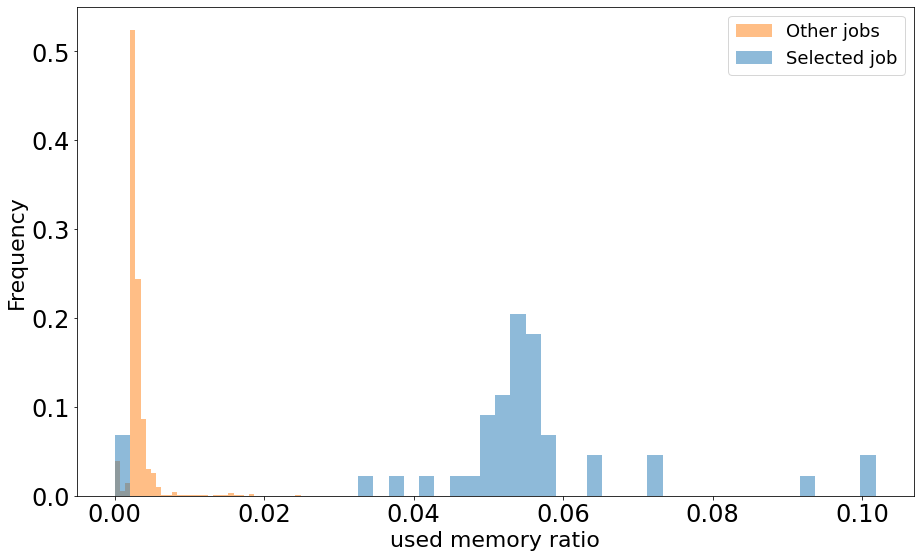

In [282]:

sel_mem_vals = sorted(selected_norm_usage["canonical memory ratio"].values.reshape((selected_norm_usage["canonical memory ratio"].values.shape[0] * selected_norm_usage["canonical memory ratio"].values.shape[1],)))

others_mem_vals = sorted(other_jobs_stats["canonical memory ratio"].values.reshape((other_jobs_stats["canonical memory ratio"].values.shape[0] * other_jobs_stats["canonical memory ratio"].values.shape[1],)))

print(len(sel_mem_vals), len(others_mem_vals))

# How to obtain bars that sum up to unity
weights_sel_mem = np.ones_like(sel_mem_vals) / len(sel_mem_vals)
weights_others_mem = np.ones_like(others_mem_vals) / len(others_mem_vals)

#
plt.clf()
#
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) # Swapped first with second
#
plt.figure(figsize=(15,9))
plt.hist(others_mem_vals, weights=weights_others_mem, bins=50, alpha = 0.5, label="Other jobs")
plt.hist(sel_mem_vals, weights=weights_sel_mem, bins=50, alpha = 0.5, label="Selected job")
#
#plt.xlim((0, 0.005))
plt.xlabel("used memory ratio", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=18)

# Select jobs - multi applications user
from user according to the number of Job IDs generated, given that he has a unique 'logical job name', excluding the onse that have to

Select the job ID that has the higher submission time - i.e., that has been submitted later than the others

In [86]:
jobs_submit_time = readings_job_events_df[(readings_job_events_df["user"] == selected_user_top) & (readings_job_events_df["event type"] == 0)][["job ID", "time"]].compute()

In [87]:
jobs_submit_time.sort_values(by=['time']).tail(3)


,job ID,time
5656,6464844500,2254527033318
5659,6464844565,2254529382250
5665,6464844920,2254532065655


In [88]:
jobs_sched_time = readings_job_events_df[(readings_job_events_df["user"] == selected_user_top) & (readings_job_events_df["event type"] == 1)][["job ID", "time"]].compute()

In [89]:
jobs_sched_time.sort_values(by=['time']).tail(3)


,job ID,time
5657,6464844500,2254528406248
5661,6464844565,2254530940819
5666,6464844920,2254533703709


Check that there are no more than one schedule for job ID

In [90]:
jobs_sched_time.groupby("job ID")["time"].nunique().sort_values(ascending=False)

job ID
6464844920    1
6283591831    1
6283574243    1
6283574301    1
6283580961    1
             ..
6285616732    1
6285616376    1
6285616239    1
6285590621    1
6280714546    1
Name: time, Length: 1098, dtype: int64

In [91]:
selected_job = jobs_sched_time.sort_values(by=['time'])["job ID"].values[-1]
selected_job

6464844920

# Extract tasks infos - multi applications user

## Selected jobs

### Selected job requests

In [92]:
cols_task_events = df_schema[df_schema['file pattern'] == 'task_events/part-?????-of-?????.csv.gz'].content.values
task_events_files = [os.path.join(data_path, 'task_events','part-00'+ str(v).zfill(3)+'-of-00500.csv.gz')
                        for v in range(0, 500)]

dfs_task_events = [delayed(pd.read_csv)(fn, header=None, index_col=False, names=cols_task_events, delimiter=',') for fn in
           task_events_files]
readings_task_events_df = dd.from_delayed(dfs_task_events)

In [93]:
selected_job_requests = readings_task_events_df[readings_task_events_df['job ID'] == selected_job].groupby(["job ID", "CPU request", "memory request", "disk space request"]).count().compute()

In [94]:
selected_job_requests = selected_job_requests[["job ID", "CPU request", "memory request", "disk space request"]]
selected_job_requests

KeyError: "None of [Index(['job ID', 'CPU request', 'memory request', 'disk space request'], dtype='object')] are in the [columns]"

In [ ]:
selected_job_requests_mean = readings_task_events_df[readings_task_events_df['job ID'] == selected_job].groupby(["job ID", "CPU request", "memory request", "disk space request"]).mean().compute()

### Selected job stats

In [ ]:
selected_job_stats = readings_task_usage_df[readings_task_usage_df['job ID'] == selected_job].groupby("end time")[['start time', 'end time',
    'CPU rate', 'canonical memory usage', 'local disk space usage']].agg([
'mean',
'min',
'max',
dd.Aggregation("perc_15", chunk=lambda x: x.quantile(0.15), agg=lambda y: y.mean()),
dd.Aggregation("perc_25", chunk=lambda x: x.quantile(0.25), agg=lambda y: y.mean()),
dd.Aggregation("median",chunk=lambda x: x.quantile(0.50), agg=lambda y: y.mean()),
dd.Aggregation("perc_75", chunk=lambda x: x.quantile(0.15), agg=lambda y: y.mean()),
dd.Aggregation("perc_90", chunk=lambda x: x.quantile(0.90), agg=lambda y: y.mean()),
dd.Aggregation("perc_95", chunk=lambda x: x.quantile(0.95), agg=lambda y: y.mean()),
dd.Aggregation("perc_99", chunk=lambda x: x.quantile(0.99), agg=lambda y: y.mean()),
]).compute()

### Selected job ratio computation

In [205]:
out = (selected_job_stats["CPU rate"].values / selected_job_requests["CPU request"].values[0])
out = np.concatenate((out, (selected_job_stats["canonical memory usage"].values / selected_job_requests["memory request"].values[0])), axis=1)
out = np.concatenate((out, (selected_job_stats["local disk space usage"].values / selected_job_requests["disk space request"].values[0])), axis=1)

selected_norm_usage = pd.DataFrame(data=out)

In [207]:
columns=[(              'CPU ratio',    'mean'),
            (              'CPU ratio',     'min'),
            (              'CPU ratio',     'max'),
            (              'CPU ratio', 'perc_15'),
            (              'CPU ratio', 'perc_25'),
            (              'CPU ratio',  'median'),
            (              'CPU ratio', 'perc_75'),
            (              'CPU ratio', 'perc_90'),
            (              'CPU ratio', 'perc_95'),
            (              'CPU ratio', 'perc_99'),
            ('canonical memory ratio',    'mean'),
            ('canonical memory ratio',     'min'),
            ('canonical memory ratio',     'max'),
            ('canonical memory ratio', 'perc_15'),
            ('canonical memory ratio', 'perc_25'),
            ('canonical memory ratio',  'median'),
            ('canonical memory ratio', 'perc_75'),
            ('canonical memory ratio', 'perc_90'),
            ('canonical memory ratio', 'perc_95'),
            ('canonical memory ratio', 'perc_99'),
            ('local disk space ratio',    'mean'),
            ('local disk space ratio',     'min'),
            ('local disk space ratio',     'max'),
            ('local disk space ratio', 'perc_15'),
            ('local disk space ratio', 'perc_25'),
            ('local disk space ratio',  'median'),
            ('local disk space ratio', 'perc_75'),
            ('local disk space ratio', 'perc_90'),
            ('local disk space ratio', 'perc_95'),
            ('local disk space ratio', 'perc_99')]

selected_norm_usage.columns = pd.MultiIndex.from_tuples(columns)
selected_norm_usage

CPU ratio                                                              \
       mean       min       max   perc_15   perc_25    median   perc_75   
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.076937  0.076937  0.076937  0.076937  0.076937  0.076937  0.076937   
2  0.865717  0.865717  0.865717  0.865717  0.865717  0.865717  0.865717   
3  0.017862  0.017862  0.017862  0.017862  0.017862  0.017862  0.017862   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                                 ... local disk space ratio                    \
    perc_90   perc_95   perc_99  ...                   mean  min  max perc_15   
0  0.000000  0.000000  0.000000  ...                    0.0  0.0  0.0     0.0   
1  0.076937  0.076937  0.076937  ...                    0.0  0.0  0.0     0.0   
2  0.865717  0.865717  0.865717  ...                    0.0  0.0  0.0     0.0   
3  0.017862  0.017862  0.017862  ...                    0.0  0.0  0.0     0.0   
4  0.000000  0.000000  0.000000  ...                    0.0  0.0  0.0     0.0   

                                                  
  perc_25 median perc_75 perc_90 perc_95 perc_99  
0     0.0    0.0     0.0     0.0     0.0     0.0  
1     0.0    0.0     0.0     0.0     0.0     0.0  
2     0.0    0.0     0.0     0.0     0.0     0.0  
3     0.0    0.0     0.0     0.0     0.0     0.0  
4     0.0    0.0     0.0     0.0     0.0     0.0  

[5 rows x 30 columns]

## Other jobs

### Other jobs requests

In [208]:
other_jobs_requests = readings_task_events_df[readings_task_events_df['job ID'].isin(other_jobs)].groupby(["job ID", "CPU request", "memory request", "disk space request"]).count().compute()

In [212]:
other_jobs_requests.reset_index(inplace=True)
other_jobs_requests = other_jobs_requests[["job ID", "CPU request", "memory request", "disk space request"]]
print(len(other_jobs_requests), len(other_jobs))

1097 1097


### Other jobs stats

In [164]:
other_jobs = jobs_sched_time.sort_values(by=['time'])["job ID"].values[:-1]

In [213]:
other_jobs_stats = readings_task_usage_df[readings_task_usage_df['job ID'].isin(other_jobs)].groupby(["job ID", "end time"])[['CPU rate', 'canonical memory usage', 'local disk space usage']].agg([
'mean',
'min',
'max',
dd.Aggregation("perc_15", chunk=lambda x: x.quantile(0.15), agg=lambda y: y.mean()),
dd.Aggregation("perc_25", chunk=lambda x: x.quantile(0.25), agg=lambda y: y.mean()),
dd.Aggregation("median",chunk=lambda x: x.quantile(0.50), agg=lambda y: y.mean()),
dd.Aggregation("perc_75", chunk=lambda x: x.quantile(0.15), agg=lambda y: y.mean()),
dd.Aggregation("perc_90", chunk=lambda x: x.quantile(0.90), agg=lambda y: y.mean()),
dd.Aggregation("perc_95", chunk=lambda x: x.quantile(0.95), agg=lambda y: y.mean()),
dd.Aggregation("perc_99", chunk=lambda x: x.quantile(0.99), agg=lambda y: y.mean()),
]).compute()

other_jobs_stats.reset_index(inplace=True)

In [226]:
other_jobs_requests[other_jobs_requests["job ID"] == 6280714546]["CPU request"].values[0]

0.125

In [231]:
for job in other_jobs_requests["job ID"].values:
    if job != 6280714546:
        other_jobs_stats[other_jobs_stats["job ID"] == job]["CPU rate"] = other_jobs_stats[other_jobs_stats["job ID"] == job]["CPU rate"].values / other_jobs_requests[other_jobs_requests["job ID"] == job]["CPU request"].values[0]
    other_jobs_stats[other_jobs_stats["job ID"] == job]["canonical memory usage"] = other_jobs_stats[other_jobs_stats["job ID"] == job]["canonical memory usage"].values / other_jobs_requests[other_jobs_requests["job ID"] == job]["memory request"].values[0]
    other_jobs_stats[other_jobs_stats["job ID"] == job]["local disk space usage"] = other_jobs_stats[other_jobs_stats["job ID"] == job]["local disk space usage"].values / other_jobs_requests[other_jobs_requests["job ID"] == job]["disk space request"].values[0]


In [240]:
columns[0] = ("job ID",)
columns[1] = ("end time",)
columns

[('job ID',),
 ('end time',),
 ('CPU ratio', 'mean'),
 ('CPU ratio', 'min'),
 ('CPU ratio', 'max'),
 ('CPU ratio', 'perc_15'),
 ('CPU ratio', 'perc_25'),
 ('CPU ratio', 'median'),
 ('CPU ratio', 'perc_75'),
 ('CPU ratio', 'perc_90'),
 ('CPU ratio', 'perc_95'),
 ('CPU ratio', 'perc_99'),
 ('canonical memory ratio', 'mean'),
 ('canonical memory ratio', 'min'),
 ('canonical memory ratio', 'max'),
 ('canonical memory ratio', 'perc_15'),
 ('canonical memory ratio', 'perc_25'),
 ('canonical memory ratio', 'median'),
 ('canonical memory ratio', 'perc_75'),
 ('canonical memory ratio', 'perc_90'),
 ('canonical memory ratio', 'perc_95'),
 ('canonical memory ratio', 'perc_99'),
 ('local disk space ratio', 'mean'),
 ('local disk space ratio', 'min'),
 ('local disk space ratio', 'max'),
 ('local disk space ratio', 'perc_15'),
 ('local disk space ratio', 'perc_25'),
 ('local disk space ratio', 'median'),
 ('local disk space ratio', 'perc_75'),
 ('local disk space ratio', 'perc_90'),
 ('local disk sp

In [243]:
other_jobs_stats["CPU ratio"]

,mean,min,max,perc_15,perc_25,median,perc_75,perc_90,perc_95,perc_99
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.015930,0.015930,0.015930,0.015930,0.015930,0.015930,0.015930,0.015930,0.015930,0.015930
3,0.001041,0.001041,0.001041,0.001041,0.001041,0.001041,0.001041,0.001041,0.001041,0.001041
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
76213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
76214,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833
76215,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115,0.000115
76216,0.001060,0.001060,0.001060,0.001060,0.001060,0.001060,0.001060,0.001060,0.001060,0.001060


# Summary and analysis of jobs - multi applications user

In [167]:
other_jobs_summary = other_jobs_stats.mean()

In [168]:
other_jobs_summary

CPU rate                mean       4.480822e-03
                        min        2.737534e-03
                        max        9.121763e-03
                        perc_15    3.130572e-03
                        perc_25    3.359263e-03
                        median     4.000450e-03
                        perc_75    3.130572e-03
                        perc_90    6.212396e-03
                        perc_95    7.047228e-03
                        perc_99    8.402454e-03
canonical memory usage  mean       3.120257e-03
                        min        2.096387e-03
                        max        5.706844e-03
                        perc_15    2.385486e-03
                        perc_25    2.521548e-03
                        median     2.867951e-03
                        perc_75    2.385486e-03
                        perc_90    4.073986e-03
                        perc_95    4.542724e-03
                        perc_99    5.301295e-03
local disk space usage  mean       1.200

In [255]:
selected_job_stats["canonical memory usage"]

,mean,min,max,perc_15,perc_25,median,perc_75,perc_90,perc_95,perc_99
end time,,,,,,,,,,
2254568000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2254754000000,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931,0.000931
2254756000000,0.000688,0.000688,0.000688,0.000688,0.000688,0.000688,0.000688,0.000688,0.000688,0.000688
2254771000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2254772000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Figure size 432x288 with 0 Axes>

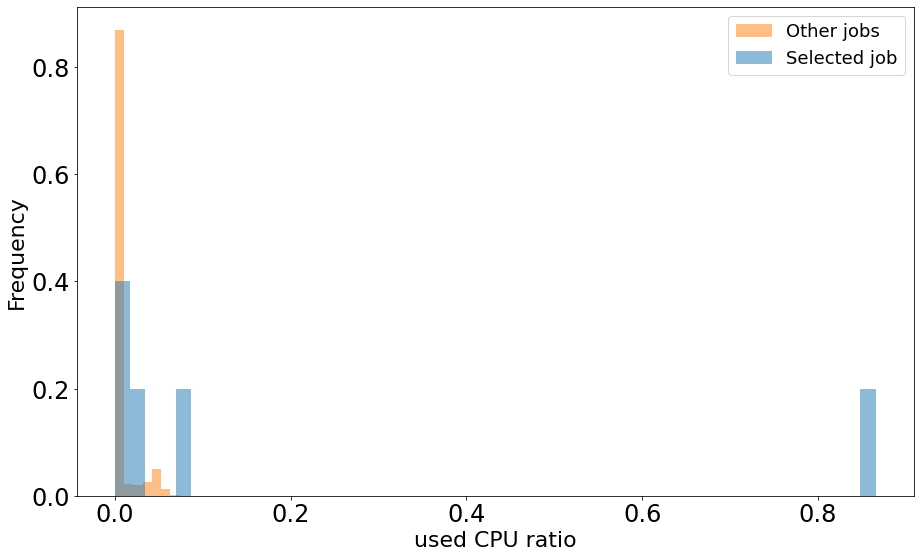

In [254]:
from scipy.stats import norm
import matplotlib as mpl
from cycler import cycler

sel_cpu_vals = sorted(selected_norm_usage["CPU ratio"].values.reshape((selected_norm_usage["CPU ratio"].values.shape[0] * selected_norm_usage["CPU ratio"].values.shape[1],)))
pdf_sel_cpu = norm.pdf(sel_cpu_vals, 0, 1)

others_cpu_vals = sorted(other_jobs_stats["CPU ratio"].values.reshape((other_jobs_stats["CPU ratio"].values.shape[0] * other_jobs_stats["CPU ratio"].values.shape[1],)))
pdf_others_cpu = norm.pdf(others_cpu_vals, 0, 1)


# How to obtain bars that sum up to unity
weights_sel = np.ones_like(sel_cpu_vals) / len(sel_cpu_vals)
weights_others = np.ones_like(others_cpu_vals) / len(others_cpu_vals)

plt.clf()

mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) # Swapped first with second

plt.figure(figsize=(15,9))
plt.hist(others_cpu_vals, weights=weights_others, bins=50, alpha = 0.5, label="Other jobs")
plt.hist(sel_cpu_vals, weights=weights_sel, bins=50, alpha = 0.5, label="Selected job")

#plt.xlim((0, 0.04))
plt.xlabel("used CPU ratio", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=18)

50 762180


<Figure size 432x288 with 0 Axes>

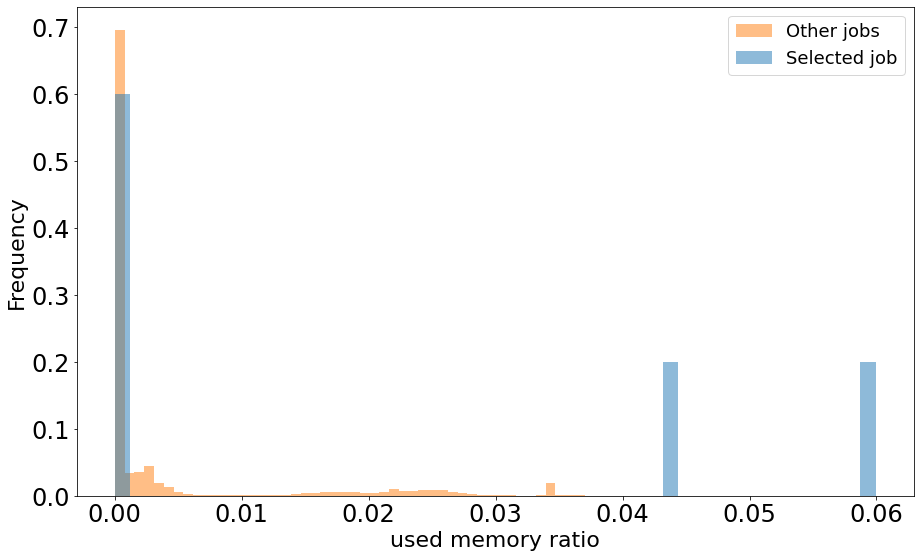

In [253]:

sel_mem_vals = sorted(selected_norm_usage["canonical memory ratio"].values.reshape((selected_norm_usage["canonical memory ratio"].values.shape[0] * selected_norm_usage["canonical memory ratio"].values.shape[1],)))

others_mem_vals = sorted(other_jobs_stats["canonical memory ratio"].values.reshape((other_jobs_stats["canonical memory ratio"].values.shape[0] * other_jobs_stats["canonical memory ratio"].values.shape[1],)))

print(len(sel_mem_vals), len(others_mem_vals))

# How to obtain bars that sum up to unity
weights_sel_mem = np.ones_like(sel_mem_vals) / len(sel_mem_vals)
weights_others_mem = np.ones_like(others_mem_vals) / len(others_mem_vals)

#
plt.clf()
#
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) # Swapped first with second
#
plt.figure(figsize=(15,9))
plt.hist(others_mem_vals, weights=weights_others_mem, bins=50, alpha = 0.5, label="Other jobs")
plt.hist(sel_mem_vals, weights=weights_sel_mem, bins=50, alpha = 0.5, label="Selected job")
#
#plt.xlim((0, 0.005))
plt.xlabel("used memory ratio", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=18)

<Figure size 432x288 with 0 Axes>

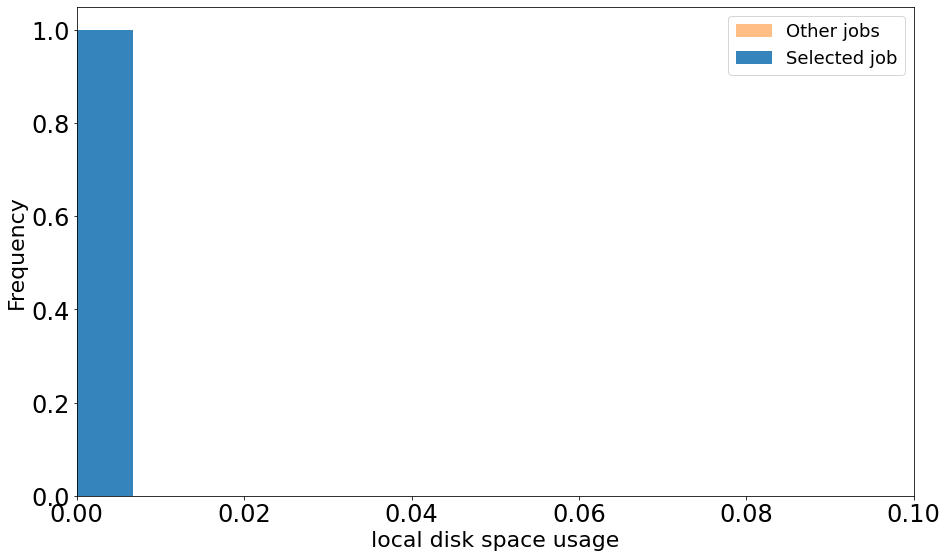

In [173]:

sel_disk_vals = sorted(selected_job_stats["local disk space usage"].values.reshape((selected_job_stats["local disk space usage"].values.shape[0] * selected_job_stats["local disk space usage"].values.shape[1],)))

others_disk_vals = sorted(other_jobs_stats["local disk space usage"].values.reshape((other_jobs_stats["local disk space usage"].values.shape[0] * other_jobs_stats["local disk space usage"].values.shape[1],)))

# How to obtain bars that sum up to unity
weights_sel_disk = np.ones_like(sel_disk_vals) / len(sel_disk_vals)
weights_others_disk = np.ones_like(others_disk_vals) / len(others_disk_vals)

#
plt.clf()
#
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']) # Swapped first with second
#
plt.figure(figsize=(15,9))
plt.hist(others_disk_vals, weights=weights_others_disk, bins=150, alpha = 0.5, label="Other jobs")
plt.hist(sel_disk_vals, weights=weights_sel_disk, bins=150, alpha = 0.9, label="Selected job")
#
plt.xlim((0, 0.1))
plt.xlabel("local disk space usage", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=18)